# RESEARCH QUESTIONS
What are the correlations between different audio features of the most popular songs of 2023 on Spotify, such as danceability and energy levels? To what extent do audio features influence the popularity of songs on streaming platforms like Spotify and Apple Music?

### DATASET

This dataset includes a list of the most famous songs of 2023 on Spotify. It contains various audio features of popular songs. It also contains information related to each song's popularity and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features. The dataset is originally posted by data scientist Nidula Elgiriyewithana on Kaggle. 

### TABLE OF CONTENTS
> [IMPORT NECESSARY LIBRARIES & SET DISPLAY SETTINGS](#IMPORT-NECESSARY-LIBRARIES-&-SET-DISPLAY-SETTINGS)

> [READ THE DATASET & DISPLAY SOME SAMPLES](#READ-THE-DATASET-&-DISPLAY-SOME-SAMPLES)

> [GET BASIC INFORMATION](#GET-BASIC-INFORMATION)

> [CALCULATE SUMMARY STATISTICS](#CALCULATE-SUMMARY-STATISTICS)

> [AUDIO FEATURES IN THE MOST POPULAR ARTIST'S SONG](#AUDIO-FEATURES-IN-THE-MOST-POPULAR-ARTIST'S-SONG)

> [DANCEABILITY LEVEL CLASSIFICATION & DISTRIBUTION](#DANCEABILITY-LEVEL-CLASSIFICATION-&-DISTRIBUTION)

> [DISTRIBUTION OF DANCEABILITY](#DISTRIBUTION-OF-DANCEABILITY)

> [ENERGY LEVEL CLASSIFICATION & DISTRIBUTION](#ENERGY-LEVEL-CLASSIFICATION-&-DISTRIBUTION)

> [DISTRIBUTION OF ENERGY](#DISTRIBUTION-OF-ENERGY)

> [VALENCE LEVEL CLASSIFICATION & DISTRIBUTION](#VALENCE-LEVEL-CLASSIFICATION-&-DISTRIBUTION)

> [CORRELATION BETWEEN DIFFERENT AUDIO FEATURES](#CORRELATION-BETWEEN-DIFFERENT-AUDIO-FEATURES)

> [INFLUENCE OF DIFFERENT AUDIO FEATURES ON POPULARITY IN SPOTIFY AND APPLE MUSIC PLAYLISTS](#INFLUENCE-OF-DIFFERENT-AUDIO-FEATURES-ON-POPULARITY-IN-SPOTIFY-AND-APPLE-MUSIC-PLAYLISTS)

> [CORRELATION BETWEEN POPULARITY OF SONGS AND VARIOUS AUDIO FEATURES](#CORRELATION-BETWEEN-POPULARITY-OF-SONGS-AND-VARIOUS-AUDIO-FEATURES)

> [CALCULATE THE AVERAGE ENERGY, DANCEABILITY, VALENCE LEVELS FOR EACH MODE](#CALCULATE-THE-AVERAGE-ENERGY,-DANCEABILITY,-VALENCE-LEVELS-FOR-EACH-MODE)

> [CALCULATE THE AVERAGE ENERGY, DANCEABILITY, VALENCE LEVELS FOR EACH YEAR](#CALCULATE-THE-AVERAGE-ENERGY,-DANCEABILITY,-VALENCE-LEVELS-FOR-EACH-YEAR)

### IMPORT NECESSARY LIBRARIES & SET DISPLAY SETTINGS 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)

### READ THE DATASET & DISPLAY SOME SAMPLES

In [9]:
spotify_df = pd.read_csv('spotify-2023.csv', delimiter=",", encoding="latin1")

In [10]:
spotify_df.sample(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
128,lovely - Bonus Track,"Billie Eilish, Khalid",2,2017,8,11,15032,30,2355719893,221,96,"1,078",2,136,115,E,Minor,35,12,30,93,0,10,3
279,Made You Look,Meghan Trainor,1,2022,10,21,3956,6,502574952,142,23,127,3,16,145,A#,Major,84,88,53,35,0,8,7
137,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",5,2023,5,22,182,8,54225632,3,88,1,0,52,110,G,Minor,76,96,72,32,0,9,4
668,California Love - Original Version (Explicit),"Dr. Dre, 2Pac, Roger",3,1995,12,28,18773,0,579395142,128,17,"1,663",0,0,92,G,Major,77,76,84,3,0,38,4
841,"Villano Antillano: Bzrp Music Sessions, Vol. 51","Bizarrap, Villano Antillano",2,2022,6,8,1401,0,248511839,26,16,17,0,1,128,C#,Minor,82,42,75,6,0,63,6
768,United In Grief,Kendrick Lamar,1,2022,5,13,2575,0,156898322,4,5,12,0,51,87,G#,Major,52,32,83,24,0,17,43
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,18,32,1,0,90,E,Minor,61,32,67,15,0,11,5
133,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",2,2023,1,11,5724,44,721975598,119,108,254,29,22,122,D,Minor,78,50,63,27,0,9,5
816,FEARLESS,LE SSERAFIM,1,2022,5,2,629,0,229497852,18,75,9,0,0,104,G,Major,86,43,62,5,0,13,14
510,Infinity,Jaymes Young,1,2017,6,23,4375,0,888046992,24,0,396,0,0,122,B,Minor,67,50,67,15,0,30,4


### GET BASIC INFORMATION

The DataFrame has 953 rows and 24 columns. The columns are track name, artist name, release year, release month, release day, presence in Spotify playlists and charts, number of streams, presence in Apple playlists and charts, presence in Deezer playlists and charts, presence in Shazam charts, beats per minute (bpm), key, mode, danceability percentage, valence percentage, energy percentage, acousticness percentage, instrumentalness percentage, liveness percentage, and speechiness percentage. 
The data types of the columns include integers and objects. 
The "in_shazam_charts" column has 50 null values. The "key" column has 95 null values.

In [8]:
spotify_df.shape

(953, 24)

In [9]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [10]:
spotify_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

### CALCULATE SUMMARY STATISTICS 
#### ❓ What is the averagy level of each of the audio features?

The "unique" row shows the number of unique values in each column. For example, there are 943 unique track_name, 645 different artists.
The "top" row shows the most frequent value in each column. For example, the most frequent track name is "Daylight" and the most frequent artist name is "Taylor Swift".
The "mean" row shows the mean (average) value for numeric columns. There are mean values of various audio features: danceability (67%), valence (51%), energy (64%), acousticness (27%), instrumentalness (2%), liveness (18%), speechiness (10%).  
The "min" and "max" rows show the minimum and maximum values for numeric columns. There are min & max values of various audio features: danceability (23%, 96%), valence (4%, 97%), energy (9%, 97%), acousticness (0%, 97%), instrumentalness (0%, 91%), liveness (3%, 97%), speechiness (2%, 64%).

In [11]:
spotify_df.describe(include='all')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953,953,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,953.000000,953,953.000000,903,953.000000,858,953,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
unique,943,645,NaN,NaN,NaN,NaN,NaN,NaN,949,NaN,NaN,348,NaN,198,NaN,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daylight,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,723894473,NaN,NaN,0,NaN,0,NaN,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,24,NaN,344,NaN,120,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,NaN,67.812172,51.908709,NaN,2.666317,NaN,122.540399,NaN,NaN,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,NaN,NaN,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,NaN,86.441493,50.630241,NaN,6.035599,NaN,28.057802,NaN,NaN,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,NaN,NaN,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,65.000000,NaN,NaN,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,NaN,NaN,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,NaN,13.000000,7.000000,NaN,0.000000,NaN,100.000000,NaN,NaN,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,NaN,NaN,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,NaN,34.000000,38.000000,NaN,0.000000,NaN,121.000000,NaN,NaN,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,NaN,NaN,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,NaN,88.000000,87.000000,NaN,2.000000,NaN,140.000000,NaN,NaN,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000


#### Conclusion

1. Danceability: The average danceability score of 67% suggests that the popular songs tend to have a relatively high potential for being danceable. 

2. Valence: With an average valence score of 51% indicates that the songs have a wide emotional range. Some songs might have a more positive tone (closer to 97%), while others could have a more melancholic tone (closer to 4%).

3. Energy: The average energy score of 64% indicates that a majority of songs might be relatively energetic.

4. Acousticness: The average acousticness score of 27% suggests that the songs are not acoustic.

5. Instrumentalness: The average instrumentalness score of 2% indicates that the songs are not instrumental. This means that they might contain vocals or lyrics.

6. Liveness: The average liveness score of 18% suggests that the songs are generally not recorded live.

7. Speechiness: The average speechiness score of 10% suggests that the songs might have a balance between instrumental elements with lyrics or spoken word elements.

### AUDIO FEATURES IN THE MOST POPULAR ARTIST'S SONG 
#### ❓ What is the average level of each of the audio features in the most popular artist's songs?
Taylor Swift seems to be the most popular artist because her name is the most frequent among all artists.
Filiter the songs by Taylor Swift and count the mean of each audio features' percentage to get the average level in her songs.

In [12]:
top_artist=spotify_df[spotify_df["artist(s)_name"]=="Taylor Swift"]
print("Taylor Swift:")
print("averge danceability level:", top_artist["danceability_%"].mean())
print("averge valence level:", top_artist["valence_%"].mean())
print("averge energy level:", top_artist["energy_%"].mean())

Taylor Swift:
averge danceability level: 59.76470588235294
averge valence level: 35.55882352941177
averge energy level: 56.794117647058826


#### Conclusion
A majority of Taylor Swift's songs have a middle level of danceability and energy, and have a more melancholic tone.

### DANCEABILITY LEVEL CLASSIFICATION & DISTRIBUTION
#### ❓ What is the danceability level for the majority of the popular songs?

Create a function classify the danceability levels to low, medium, and hight. Apply this function to the danceability_% column and create a new column based on the result.

In [13]:
def danceability_level(danceability):
    if danceability > 70:  
        return 'High' 
    elif danceability > 50:  
        return 'Medium'
    else:
        return 'Low'

In [14]:
spotify_df['danceability_level'] = spotify_df['danceability_%'].apply(danceability_level)
print(spotify_df['danceability_level'].value_counts())

danceability_level
High      428
Medium    389
Low       136
Name: count, dtype: int64


#### Conclusion
A majority of the songs have a high danceability level, fewer songs with a medium danceability level, the smallest number of songs with a low energy level. This distribution suggests that most popular songs on Spotify seems to have a higher danceability level.

### DISTRIBUTION OF DANCEABILITY
#### ❓ What is the danceability percentage with the highest frequency?

Create a histogram of the 'danceability_%' column. 
The 'bins' parameter is set to 15, indicating the number of bars in the histogram is 15. The x-axis of the histogram is the percentage of danceability. The y-axis of the histogram as 'Frequency', representing the number of occurrences of each danceability percentage. 

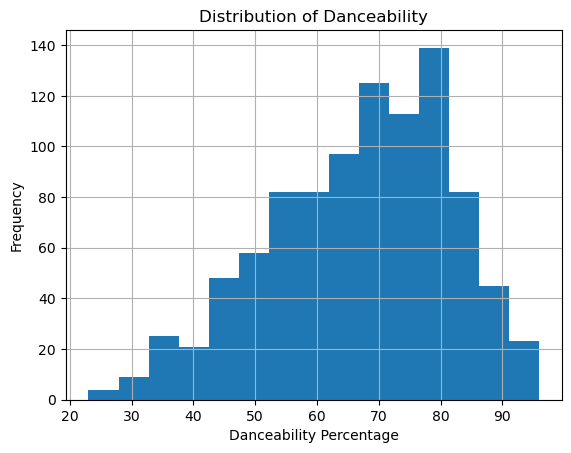

In [15]:
spotify_df['danceability_%'].hist(bins=15)
plt.xlabel('Danceability Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.show()

#### Conclusion
The danceability percentages in the range of 65-80% have the highest frequency. This suggests that a significant number of songs have a danceability percentage within this range. It indicates that most popular songs on Spotify in 2023 are likely to have a high level of danceability.

### ENERGY LEVEL CLASSIFICATION & DISTRIBUTION 
#### ❓ What is the energy level for the majority of the popular songs?

Create a function classify the energy levels to low, medium, and hight. Apply this function to the energy_% column and create a new column based on the result.

In [16]:
def energy_level(energy):
    if energy > 77:  # energy%_max=77%
        return 'High' 
    elif energy > 40:  # energy%_50%=66%
        return 'Medium'
    else:
        return 'Low'

In [17]:
spotify_df['energy_level'] = spotify_df['energy_%'].apply(energy_level)
print(spotify_df['energy_level'].value_counts())

energy_level
Medium    639
High      227
Low        87
Name: count, dtype: int64


#### Conclusion
A majority of the songs have a medium energy level, fewer songs with a high energy level and the smallest number of songs with a low energy level. This distribution suggests that most popular songs on Spotify seems to have a medium or high energy level.

### DISTRIBUTION OF ENERGY
#### ❓ Is there any song with an unusual energy percentage?

Create a boxplot of the 'energy_%' column. 

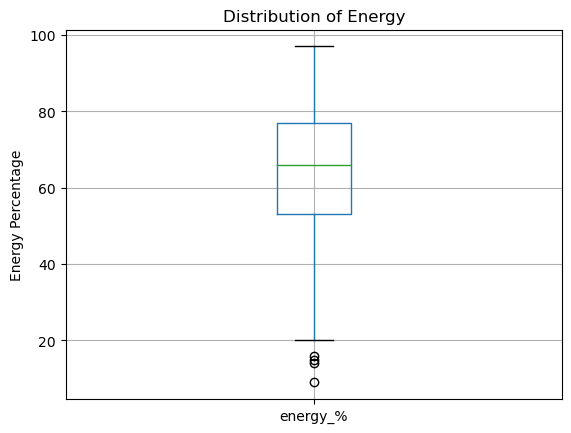

In [18]:
spotify_df.boxplot(column='energy_%')
plt.ylabel('Energy Percentage')
plt.title('Distribution of Energy')
plt.show()

#### Conclusion

1. The lower quartile (25%) energy percentage is around 50% (53%), suggesting that 25% songs have a medium or low energy level.
2. The upper quartile (75%) energy percentage is around 80% (78%), indicating that 25% songs have a high energy level.
3. The minimum energy percentage is around 20%, while the maximum energy percentage is 96%.
4. Outliers: there are some data points is below 20%. These points significantly deviate from the majority of the data. This indicates that there are songs in the dataset with unusually low energy percentages compared to the rest. 
5. The median energy percentage is around 70% (69%), indicating that the distribution of energy levels in the songs is relatively balanced.

### VALENCE LEVEL CLASSIFICATION & DISTRIBUTION
#### ❓ What is the valence level for the majority of the popular songs?

Create a function classify the valence levels to low, medium, and hight. Apply this function to the valence_% column and create a new column based on the result.

In [19]:
def valence_level(valence):
    if valence > 66:  
        return 'High' 
    elif valence > 33:  
        return 'Medium'
    else:
        return 'Low'

In [20]:
spotify_df['valence_level'] = spotify_df['valence_%'].apply(valence_level)
print(spotify_df['valence_level'].value_counts())

valence_level
Medium    421
High      281
Low       251
Name: count, dtype: int64


#### Conclusion
A majority of the popular songs on Spotify have a medium valence level, fewer songs with a high or lower energy level. 

### CORRELATION BETWEEN DIFFERENT AUDIO FEATURES 
#### ❓What are the correlations between different audio features?

BPM, ENERGY, DANCEABILITY, VALENCE, ACOUSTICNESS, INSTRUMENTALNESS, LIVENESS, SPEECHINESS

Create a correlation matrix to find the relationship between bpm, energy, danceability, valence, acousticness, instrumentalness, livenss, speechiness. Also, create a heatmap of the correlation matrix.

In [21]:
correlation_audio_features = spotify_df[['bpm','energy_%', 'danceability_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()
correlation_audio_features

,bpm,energy_%,danceability_%,valence_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
bpm,1.000000,0.025794,-0.147095,0.041195,-0.017694,-0.001195,-0.000761,0.039260
energy_%,0.025794,1.000000,0.198095,0.357612,-0.577344,-0.038547,0.117302,-0.004846
danceability_%,-0.147095,0.198095,1.000000,0.408451,-0.236165,-0.089138,-0.077538,0.184977
valence_%,0.041195,0.357612,0.408451,1.000000,-0.081907,-0.132890,0.021278,0.041081
acousticness_%,-0.017694,-0.577344,-0.236165,-0.081907,1.000000,0.042796,-0.050142,-0.022501
instrumentalness_%,-0.001195,-0.038547,-0.089138,-0.132890,0.042796,1.000000,-0.045967,-0.083396
liveness_%,-0.000761,0.117302,-0.077538,0.021278,-0.050142,-0.045967,1.000000,-0.022525
speechiness_%,0.039260,-0.004846,0.184977,0.041081,-0.022501,-0.083396,-0.022525,1.000000


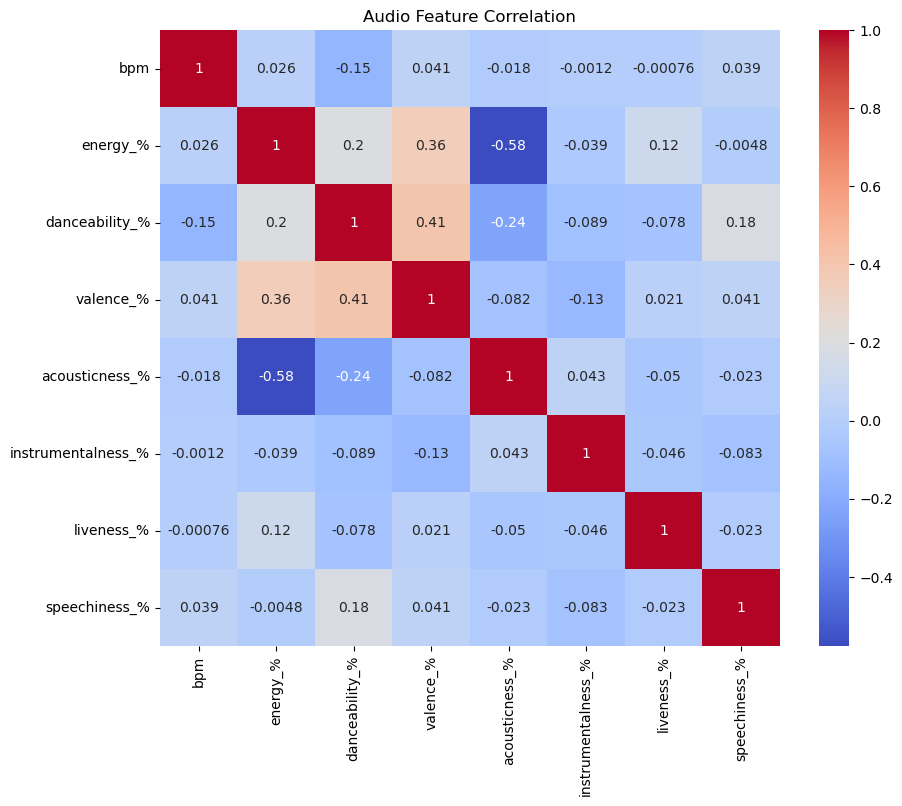

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_audio_features, annot=True, cmap='coolwarm')
plt.title('Audio Feature Correlation')
plt.show()

#### Conclusion

1. There is a high correlation between valence and danceability (0.408451), suggesting that more danceable music tends to have higher valence.
2. There is a high correlation between energy and valence (0.357612), suggesting that higher energy tends to be associated with more positive valence in the music.
3. There is a high correlation between energy and danceability (0.198095), suggesting that higher energy tends to be associated with more danceable music.
4. There is a high correlation between speechiness and danceability (0.184977), suggesting that more danceable music tends to have higher speechiness.
5. There is a low correlation between acousticness and energy (-0.577344), indicating that higher energy tends to be associated with less acoustic music.
6. There is a low correlation between danceability and bpm (-0.147095), indicating that more danceable music tends to have less beats per minute. 

### INFLUENCE OF DIFFERENT AUDIO FEATURES ON POPULARITY IN SPOTIFY AND APPLE MUSIC PLAYLISTS
#### ❓Do the audio features impact the popularity of the songs on Spotify or Apple Music?

Create a correlation matrix to find the relationship between the three audio features (energy, danceability, valence) and the the numbers of songs appears in user's playlists on two music platform. "In_playlists" indicate how frequently a song is added to playlists and how's users' reception of the songs, which reflects the popularity of the songs. 

In [23]:
correlation_audio_features_popularity = spotify_df[['energy_%', 'danceability_%', 'valence_%', 'in_spotify_playlists', 'in_apple_playlists']].corr()
correlation_audio_features_popularity

,energy_%,danceability_%,valence_%,in_spotify_playlists,in_apple_playlists
energy_%,1.000000,0.198095,0.357612,0.033808,0.052615
danceability_%,0.198095,1.000000,0.408451,-0.106534,-0.025326
valence_%,0.357612,0.408451,1.000000,-0.021883,0.057075
in_spotify_playlists,0.033808,-0.106534,-0.021883,1.000000,0.708277
in_apple_playlists,0.052615,-0.025326,0.057075,0.708277,1.000000


#### Conclusion

result:

- Energy and In Spotify Playlists: The correlation coefficient is 0.033.
- Energy and In Apple Playlists: The correlation coefficient is 0.053.

- Danceability and In Spotify Playlists: The correlation coefficient is -0.107.
- Danceability and In Apple Playlists: The correlation coefficient is -0.025.

- Valence and In Spotify Playlists: The correlation coefficient is -0.022.
- Valence and In Apple Playlists: The correlation coefficient is 0.057.

The result indcates that there is no strong relationship between the energy, danceability, and valence of songs and their popularity on Spotify or Apple Music because the correlations are close to zero, suggesting that these audio features have limited influence on the songs' popularity on the two platforms.

### CORRELATION BETWEEN POPULARITY OF SONGS AND VARIOUS AUDIO FEATURES 
#### ❓Do the audio features impact the popularity of the songs in general?

In [24]:
# clean data
# There are non-numeric values in the 'streams' column, so the data needed to be cleaned before calculating the correlation. 
# The step below is cleaning the non-numeric values and converting the 'streams' column to numeric format.
# The `errors='coerce'` parameter ensures that any non-numeric values are replaced with NaN (missing values). 

spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')

# Drop rows with missing values in the 'streams' column
spotify_df = spotify_df.dropna(subset=['streams'])

# Correlation between popular songs by streams and different audio features.
correlation_popularity_energy = spotify_df['streams'].corr(spotify_df['energy_%'])
correlation_popularity_danceability = spotify_df['streams'].corr(spotify_df['danceability_%'])
correlation_popularity_bpm = spotify_df['streams'].corr(spotify_df['bpm'])
correlation_popularity_valence = spotify_df['streams'].corr(spotify_df['valence_%'])
correlation_popularity_acousticness = spotify_df['streams'].corr(spotify_df['acousticness_%'])
correlation_popularity_instrumentalness = spotify_df['streams'].corr(spotify_df['instrumentalness_%'])
correlation_popularity_liveness = spotify_df['streams'].corr(spotify_df['liveness_%'])
correlation_popularity_speechiness = spotify_df['streams'].corr(spotify_df['speechiness_%'])

print("Correlation between popularity and energy:", correlation_popularity_energy)
print("Correlation between popularity and danceability:", correlation_popularity_danceability)
print("Correlation between popularity and bpm:", correlation_popularity_bpm)
print("Correlation between popularity and valence:", correlation_popularity_valence)
print("Correlation between popularity and acousticness:", correlation_popularity_acousticness)
print("Correlation between popularity and instrumentalness:", correlation_popularity_instrumentalness)
print("Correlation between popularity and liveness:", correlation_popularity_liveness)
print("Correlation between popularity and speechiness:", correlation_popularity_speechiness)

Correlation between popularity and energy: -0.026051488364248913
Correlation between popularity and danceability: -0.10545688369141903
Correlation between popularity and bpm: -0.002437908138271807
Correlation between popularity and valence: -0.040831367495159455
Correlation between popularity and acousticness: -0.004484652700684057
Correlation between popularity and instrumentalness: -0.04490247317510974
Correlation between popularity and liveness: -0.04833729577983245
Correlation between popularity and speechiness: -0.1123329964033855


#### Conclusion

The results indicate that none of these audio features have a strong positive or negative correlation with the popularity of songs.

### CALCULATE THE AVERAGE ENERGY, DANCEABILITY, VALENCE LEVELS FOR EACH MODE
#### ❓Is the audio features related to the modes of the songs?

Group the data by the 'mode' column and calculate the average 'energy_%', 'danceability_%', 'valence_%' for each mode.

In [25]:
avg_energy_by_mode = spotify_df.groupby('mode')['energy_%'].mean()
print(avg_energy_by_mode)

mode
Major    63.491803
Minor    65.339950
Name: energy_%, dtype: float64


In [26]:
avg_energy_by_mode = spotify_df.groupby('mode')['danceability_%'].mean()
print(avg_energy_by_mode)

mode
Major    65.260474
Minor    69.332506
Name: danceability_%, dtype: float64


In [27]:
avg_energy_by_mode = spotify_df.groupby('mode')['valence_%'].mean()
print(avg_energy_by_mode)

mode
Major    50.092896
Minor    53.196030
Name: valence_%, dtype: float64


#### Conclusion
The popular songs in both major and minor modes have similar energy, danceability, valence levels. 

### CALCULATE THE AVERAGE ENERGY, DANCEABILITY, VALENCE LEVELS FOR EACH YEAR
#### ❓Is there a general shift of the audio features of theses songs over time?

Group the data by the 'released_year' column and calculate the average 'energy_%', 'danceability_%', 'valence_%' for each mode.

In [28]:
# sort the data by released year in ascending order to check the range of years of these popular songs
spotify_df_sorted_year = spotify_df.sort_values('released_year')
spotify_df_sorted_year

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,danceability_level,energy_level,valence_level
439,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",3,1930,1,1,323,0,90598517.0,4,0,14,0,0,130,F#,Minor,65,49,80,22,4,7,5,Medium,High,Medium
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1942,1,1,11940,0,395591396.0,73,79,123,0,0,96,A,Major,23,19,25,91,0,40,3,Low,Low,Low
460,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,1946,11,1,11500,0,389771964.0,140,72,251,0,0,139,C#,Major,36,22,15,84,0,11,4,Low,Low,Low
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298.0,126,108,406,0,0,143,D,Major,60,86,32,88,0,34,6,Medium,Low,High
459,A Holly Jolly Christmas - Single Version,Burl Ives,1,1952,1,1,7930,0,395591396.0,108,120,73,0,0,140,NaN,Major,67,81,36,64,0,15,3,Medium,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Bite Me,ENHYPEN,1,2023,5,22,349,69,76767396.0,8,96,5,0,56,105,C#,Major,80,69,78,28,0,11,14,High,High,High
223,Snow On The Beach (feat. More Lana Del Rey),"Lana Del Rey, Taylor Swift",2,2023,5,26,359,2,60350538.0,1,0,9,0,0,110,F#,Minor,66,32,40,81,0,11,3,Medium,Low,Low
220,Las Morras,"BLESSD, Peso Pluma",2,2023,4,4,291,8,127026613.0,8,78,4,1,1,133,A,Minor,78,90,84,31,0,7,4,High,High,High
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",2,2023,5,19,896,0,57089066.0,34,2,33,0,1,126,C#,Major,78,20,70,1,0,16,4,High,Medium,Low


In [29]:
avg_energy_by_year = spotify_df.groupby('released_year')['energy_%'].mean()
avg_danceability_by_year = spotify_df.groupby('released_year')['danceability_%'].mean()
avg_valence_by_year = spotify_df.groupby('released_year')['valence_%'].mean()

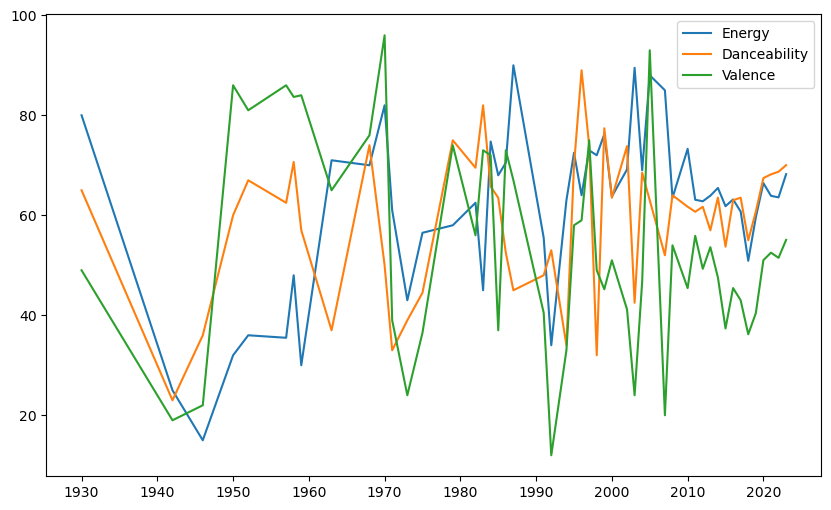

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(avg_energy_by_year.index, avg_energy_by_year, label='Energy')
plt.plot(avg_danceability_by_year.index, avg_danceability_by_year, label='Danceability')
plt.plot(avg_valence_by_year.index, avg_valence_by_year, label='Valence')
plt.xticks(range(1930, 2023, 10))
plt.legend()
plt.show()

#### Conclusion
1. The trends of energy, danceability, and valence have a peak at 1930 and a noticeable valley between 1940-1950. 
2. The songs released after the 1945 tends to have higher energy, danceability, and valence. 
3. The 1970s seem to be a peak period for energy and danceability, while the 1950s and 1960s have a higher valence. 
4. The three trends' changes are similar from 2010 to 2020.
5. These observations indicate that there is no general shift towards more or less energetic, danceable, and positive music over time. 

## SUMMARY
The analysis of audio features such as energy, danceability, and valence in popular songs on Spotify reveals that while audio features might significantly contribute to the users' listening experience, they do not strongly influence the popularity of songs on Spotify or Apple. Also, there are noticeable trends over time in the energy, danceability, and valence of songs. 

However, the results show some general audio features of these popular songs: the majority of these songs have a high danceability level, a medium energy level, and a medium valence levels. Also, there are correlations between danceability and valence, energy and valence, energy and danceability, and speechiness and danceability. Additionaly, the mode of a song (major or minor) does not significantly impact its audio features.